In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("churn_analysis.csv")

In [45]:
control_group = df[df.treatment == 1]

In [46]:
control_group

,Unnamed: 0,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,0,KS,128,415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
3,3,OH,84,408,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
8,8,LA,117,408,no,no,0,184.5,97,31.37,...,215.8,90,9.71,8.7,4,2.35,1,1,0.50,False.
12,12,IA,168,408,no,no,0,128.8,96,21.90,...,141.1,128,6.35,11.2,2,3.02,1,1,0.37,False.
17,17,VT,93,510,no,no,0,190.7,114,32.42,...,129.6,121,5.83,8.1,3,2.19,3,1,0.84,False.
21,21,CO,77,408,no,no,0,62.4,89,10.61,...,209.6,64,9.43,5.7,6,1.54,5,1,0.47,True.
26,26,WY,57,408,no,yes,39,213.0,115,36.21,...,182.7,115,8.22,9.5,3,2.57,0,1,0.63,False.
28,28,MO,20,415,no,no,0,190.0,109,32.30,...,181.5,102,8.17,6.3,6,1.70,0,1,0.78,False.
32,32,LA,172,408,no,no,0,212.0,121,36.04,...,293.3,78,13.20,12.6,10,3.40,3,1,0.51,False.
35,35,GA,72,415,no,yes,37,220.0,80,37.40,...,152.8,71,6.88,14.7,6,3.97,3,1,0.41,False.


In [47]:
states = set(control_group.state)

In [48]:
states

{'AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY'}

In [49]:
all_states = list(states)

In [50]:
all_states

['WA',
 'DE',
 'DC',
 'WI',
 'WV',
 'HI',
 'FL',
 'WY',
 'NH',
 'NJ',
 'NM',
 'TX',
 'LA',
 'NC',
 'ND',
 'NE',
 'TN',
 'NY',
 'PA',
 'RI',
 'NV',
 'VA',
 'CO',
 'AK',
 'AL',
 'AR',
 'VT',
 'IL',
 'GA',
 'IN',
 'IA',
 'OK',
 'AZ',
 'CA',
 'ID',
 'CT',
 'ME',
 'MD',
 'MA',
 'OH',
 'UT',
 'MO',
 'MN',
 'MI',
 'KS',
 'MT',
 'MS',
 'SC',
 'KY',
 'OR',
 'SD']

In [51]:
len(control_group[(control_group.state == 'KY') &(control_group.churn == 'False.')])

21

In [29]:
from scipy.stats import chi2_contingency

In [52]:
p_values = []
cont_table = np.zeros((2, 2))
for i in range(len(all_states)):
    for j in range(i + 1, len(all_states)):
        cont_table[0][0] = len(control_group[(control_group.state == all_states[i]) &(control_group.churn == 'True.')])
        cont_table[0][1] = len(control_group[(control_group.state == all_states[i]) &(control_group.churn == 'False.')])
        cont_table[1][0] = len(control_group[(control_group.state == all_states[j]) &(control_group.churn == 'True.')])
        cont_table[1][1] = len(control_group[(control_group.state == all_states[j]) &(control_group.churn == 'False.')])
        g, p, dof, expctd = (chi2_contingency(cont_table, correction=False))
        p_values.append(p)
p_values

[0.05497432872169419,
 0.038666166884066024,
 0.05423189028771341,
 0.1896116244033974,
 0.11490511459455609,
 0.10039476163648599,
 0.07356711959626612,
 0.3763633797941922,
 0.265102907307668,
 0.025857348777000477,
 0.9752984802827629,
 0.01800078287023772,
 0.2673669895081009,
 0.13314731874824895,
 0.13314731874824895,
 0.13940048510352634,
 0.2853220468558755,
 0.555862720057815,
 0.33903998868644947,
 0.6771322070354991,
 0.15276274311762741,
 0.5589170075522103,
 0.03253494340118091,
 0.23522360531613157,
 0.9567302720359742,
 0.5018697491109197,
 0.13940048510352634,
 0.08587188268071018,
 0.15276274311762741,
 0.22550021426781022,
 0.31650259225579497,
 0.11757394226052782,
 0.8509624453698859,
 0.13794347533139323,
 0.23522360531613157,
 0.8844579257532614,
 0.45047461794778354,
 0.9242917432628543,
 0.05423189028771341,
 0.33903998868644947,
 0.38359646409457926,
 0.08587188268071018,
 0.5589170075522103,
 0.852914797545359,
 0.20763663403466787,
 0.265102907307668,
 0.6221

In [53]:
ans_1 = sum(1 for p in p_values if p < 0.05)

In [54]:
ans_1

34

In [58]:
p_values_1 = []
cont_table = np.zeros((2, 2))
for i in range(len(all_states)):
    for j in range(i + 1, len(all_states)):
        cont_table[0][0] = len(control_group[(control_group.state == all_states[i]) &(control_group.churn == 'True.')])
        cont_table[0][1] = len(control_group[(control_group.state == all_states[i]) &(control_group.churn == 'False.')])
        cont_table[1][0] = len(control_group[(control_group.state == all_states[j]) &(control_group.churn == 'True.')])
        cont_table[1][1] = len(control_group[(control_group.state == all_states[j]) &(control_group.churn == 'False.')])
        g, p, dof, expctd = (chi2_contingency(cont_table, correction=True))
        p_values_1.append(p)
p_values_1

[0.12869431510798796,
 0.09433219478319192,
 0.12014041864303951,
 0.32669723925920524,
 0.24637110486328825,
 0.20509688558413192,
 0.15662150215518922,
 0.6332001684816828,
 0.44140466494176855,
 0.06298153470177671,
 0.7627312068261954,
 0.05267928270022824,
 0.4561461070366072,
 0.2520781145965037,
 0.2520781145965037,
 0.29188152639630627,
 0.45520893137396334,
 0.815088395341513,
 0.5424547242237815,
 0.9281158927845203,
 0.2835491496188025,
 0.8047010718170874,
 0.0809958944901469,
 0.3920548576381182,
 0.765386869926545,
 0.737040266002149,
 0.29188152639630627,
 0.1791232230897685,
 0.2835491496188025,
 0.41123828687569675,
 0.5478383165397469,
 0.23512098283725855,
 0.8657168041078585,
 0.2698761050667428,
 0.3920548576381182,
 0.8701362472438259,
 0.6744660458253636,
 0.8227595795157217,
 0.12014041864303951,
 0.5424547242237815,
 0.6011320205830333,
 0.1791232230897685,
 0.8047010718170874,
 0.8946449489595582,
 0.35910803989690954,
 0.44140466494176855,
 0.8775911580682291

In [59]:
ans_2 = sum(1 for p in p_values_1 if p < 0.05)

In [60]:
ans_2

0

In [61]:
r = 0
for i in range(len(p_values)):
    if p_values_1[i] > p_values[i]:
        r += 1
r

1054

In [40]:
from scipy.stats import fisher_exact

In [64]:
p_values_f = []
cont_table = np.zeros((2, 2))
for i in range(len(all_states)):
    for j in range(i + 1, len(all_states)):
        cont_table[0][0] = len(control_group[(control_group.state == all_states[i]) &(control_group.churn == 'True.')])
        cont_table[0][1] = len(control_group[(control_group.state == all_states[i]) &(control_group.churn == 'False.')])
        cont_table[1][0] = len(control_group[(control_group.state == all_states[j]) &(control_group.churn == 'True.')])
        cont_table[1][1] = len(control_group[(control_group.state == all_states[j]) &(control_group.churn == 'False.')])
        g, p = (fisher_exact(cont_table))
        p_values_f.append(p)
p_values_f

[0.10741510741510739,
 0.05407771749235168,
 0.07226467309015176,
 0.20782889594092177,
 0.2125400772099719,
 0.14165280075660136,
 0.13455211832977015,
 0.4495681476149975,
 0.31765907793230663,
 0.060695787316563166,
 1.0,
 0.029057017543859615,
 0.30490340246437797,
 0.16809151192033356,
 0.16809151192033356,
 0.21615193352090536,
 0.34391147065008165,
 0.7262464607075143,
 0.4907696867424588,
 0.751642428201966,
 0.28366644929322127,
 0.7381101246104094,
 0.05035831241163062,
 0.32428228823294697,
 1.0,
 0.7381101246104065,
 0.21615193352090536,
 0.13681142637467075,
 0.28366644929322127,
 0.2733443145532424,
 0.43777317934960414,
 0.14943968358602538,
 1.0,
 0.25442234967266975,
 0.32428228823294697,
 1.0,
 0.517082499281605,
 1.0,
 0.07226467309015176,
 0.4907696867424588,
 0.4940763770882872,
 0.13681142637467075,
 0.7381101246104094,
 1.0,
 0.30628157539792666,
 0.31765907793230663,
 0.7402745037458591,
 0.3105106280861463,
 0.2868940322145086,
 0.28366644929322127,
 1.0,
 1.0,

In [67]:
r = 0
for i in range(len(p_values)):
    if p_values_1[i] > p_values_f[i]:
        r += 1
r

767

In [68]:
df.corr()

,Unnamed: 0,account_length,area_code,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim
Unnamed: 0,1.000000,0.036667,-0.018333,-0.018086,-0.020769,0.000272,-0.020769,0.013872,0.009149,0.013875,0.011295,0.000995,0.011311,0.005822,-0.011221,0.005780,0.009665,0.012724,-0.041041
account_length,0.036667,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.042534,-0.006100
area_code,-0.018333,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.028902,0.017656
vmail_message,-0.018086,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,0.016434,0.000522
day_mins,-0.020769,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,-0.042209,-0.014831
day_calls,0.000272,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.006683,-0.051794
day_charge,-0.020769,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,-0.042212,-0.014824
eve_mins,0.013872,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,-0.004910,-0.016408
eve_calls,0.009149,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,-0.019964,0.021278
eve_charge,0.013875,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,-0.004900,-0.016409


In [69]:
from scipy.stats import pearsonr
corr, p = pearsonr(df.day_calls.values, df.mes_estim.values)
corr, p

(-0.051794350587572625, 0.0027798836869756707)

In [70]:
from scipy.stats import spearmanr
corr, p = spearmanr(df.day_calls.values, df.mes_estim.values)
corr, p

(0.043349880533927444, 0.012317367189170541)

In [71]:
from scipy.stats import probplot

In [72]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


((array([-3.5297919 , -3.28786833, -3.15418238, ...,  3.15418238,
          3.28786833,  3.5297919 ]),
  array([  0,   0,  30, ..., 160, 163, 165], dtype=int64)),
 (20.06326629015901, 100.43564356435644, 0.9989016969302865))

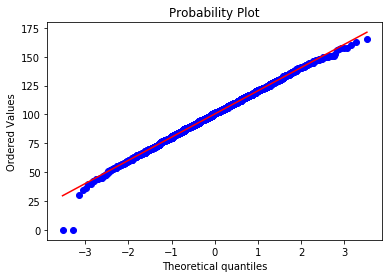

In [73]:
probplot(df.day_calls.values, dist = 'norm', plot = pylab)

((array([-3.5297919 , -3.28786833, -3.15418238, ...,  3.15418238,
          3.28786833,  3.5297919 ]),
  array([0.05, 0.05, 0.05, ..., 0.89, 0.91, 0.96])),
 (0.13861708020693372, 0.4842364236423642, 0.9996050483985331))

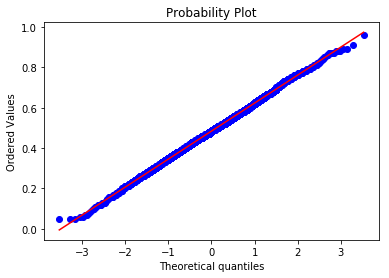

In [74]:
probplot(df.mes_estim.values, dist = 'norm', plot = pylab)

In [76]:
def Cramer_correlation(table):
    chi_stat = chi2_contingency(table)[0]
    k_min = np.min(table.shape)
    n = np.sum(table)
    return np.sqrt(chi_stat/(n*(k_min-1)))

In [77]:
cont_table = np.zeros((len(all_states), 2))
for i in range(len(all_states)):
    cont_table[i][0] = len(control_group[(control_group.state == all_states[i]) &(control_group.churn == 'True.')])
    cont_table[i][1] = len(control_group[(control_group.state == all_states[i]) &(control_group.churn == 'False.')])
Cramer_correlation(cont_table)

0.20039321502033322

In [78]:
cont_table

array([[ 7., 16.],
       [ 1., 16.],
       [ 1., 18.],
       [ 2., 22.],
       [ 5., 27.],
       [ 1., 12.],
       [ 2., 18.],
       [ 2., 20.],
       [ 2., 10.],
       [ 4., 20.],
       [ 2., 27.],
       [ 6., 14.],
       [ 0., 15.],
       [ 3., 16.],
       [ 3., 21.],
       [ 3., 21.],
       [ 1., 11.],
       [ 6., 27.],
       [ 4., 14.],
       [ 4., 18.],
       [ 6., 18.],
       [ 3., 20.],
       [ 5., 17.],
       [ 1., 19.],
       [ 5., 25.],
       [ 5., 11.],
       [ 5., 18.],
       [ 1., 11.],
       [ 2., 19.],
       [ 3., 20.],
       [ 2., 13.],
       [ 2., 11.],
       [ 2., 17.],
       [ 5., 10.],
       [ 2., 16.],
       [ 5., 25.],
       [ 8., 20.],
       [ 5., 19.],
       [ 7., 17.],
       [ 2., 22.],
       [ 4., 18.],
       [ 4., 17.],
       [ 2., 19.],
       [ 5., 17.],
       [ 7., 18.],
       [ 4., 22.],
       [ 4., 20.],
       [ 5., 16.],
       [ 4., 21.],
       [ 3., 18.],
       [ 3., 20.]])

In [79]:
print chi2_contingency(cont_table)[1]

0.7097590042778467
